## Työttömyysasteaikasarja

In [2]:
library("ggplot2")
library("readxl")

options(repr.plot.width=20, repr.plot.height=12)

In [28]:
#Tuodaan data ja muodostetaan dataframe
data = read_xls("~/Documents/Datasets/unrate.xls")
data = data.frame(data)
data$DATE = as.Date(data$DATE)
colnames(data) = c("PVM","Naiset","Miehet","Mustat","Latino")

head(data)

,PVM,Naiset,Miehet,Mustat,Latino
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,1948-01-01,3.3,3.4,NA,NA
2,1948-02-01,4.5,3.6,NA,NA
3,1948-03-01,4.4,3.8,NA,NA
4,1948-04-01,4.3,3.8,NA,NA
5,1948-05-01,3.7,3.5,NA,NA
6,1948-06-01,4.3,3.3,NA,NA


Warning message:
“Removed 288 row(s) containing missing values (geom_path).”
Warning message:
“Removed 302 row(s) containing missing values (geom_path).”


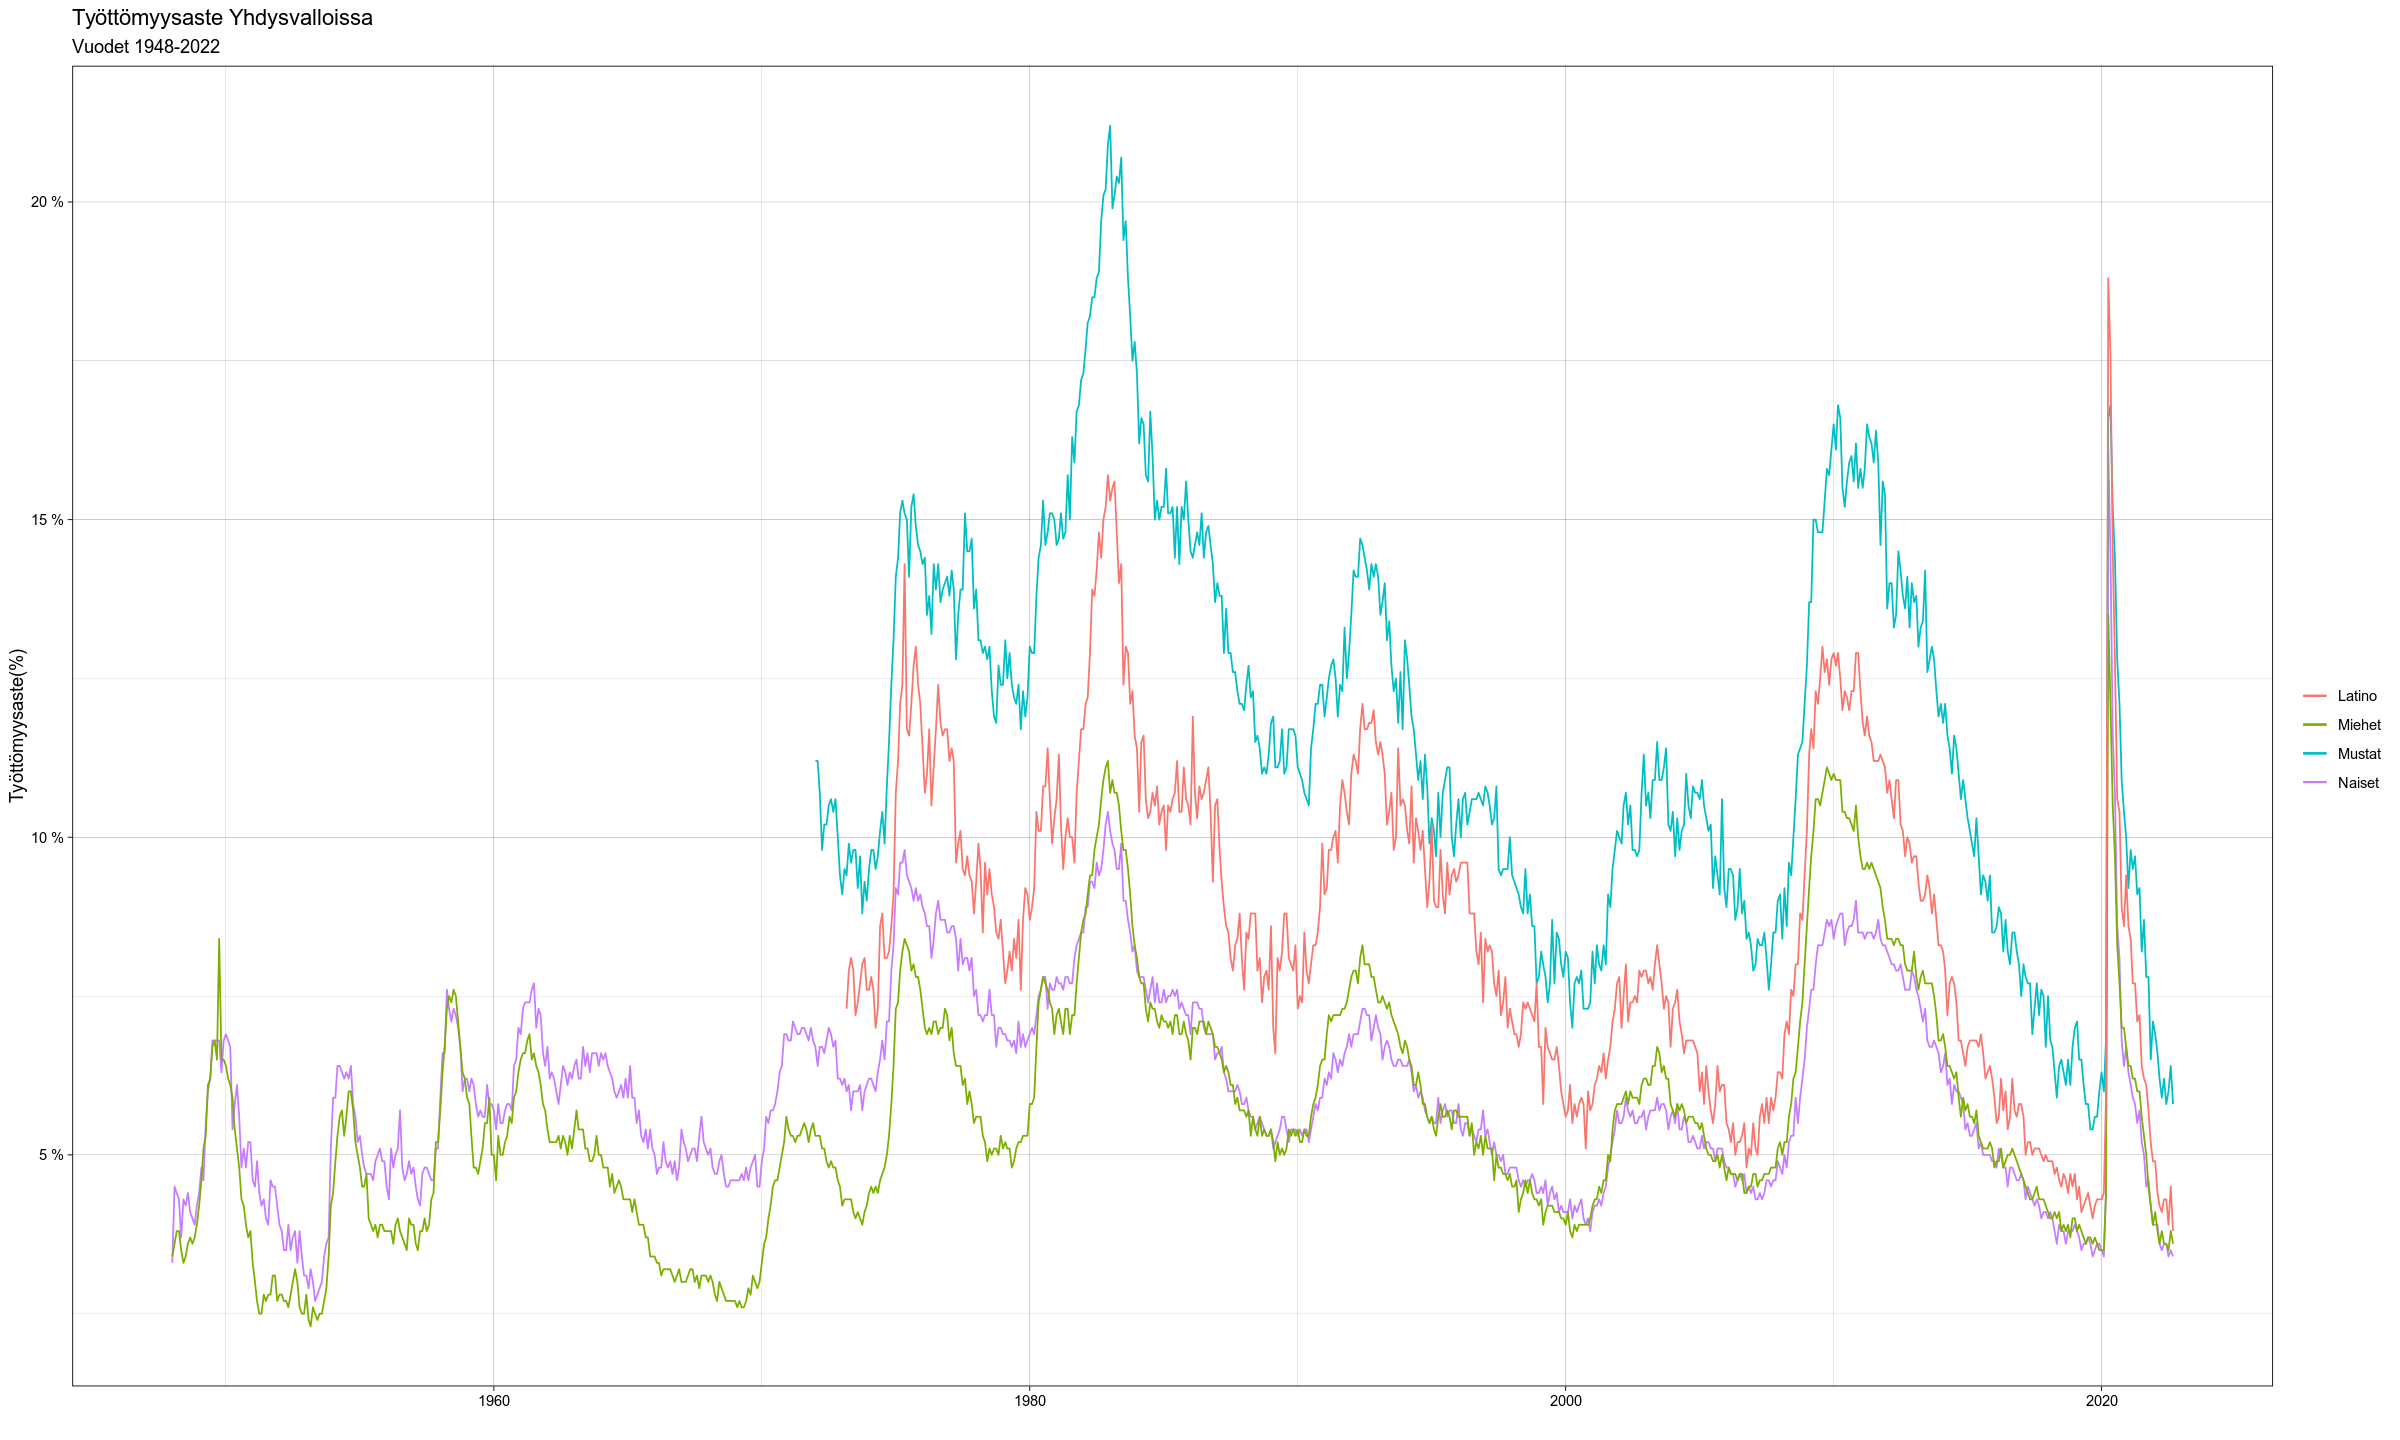

In [52]:
#Kaikkien etnisten tyhmien työttömyysaste samassa kuvaajassa
unrate= ggplot(data, aes(x=pvm)) +
        geom_line(aes(y=Naiset, col="Naiset")) +
        geom_line(aes(y=Miehet, col="Miehet")) +
        geom_line(aes(y=Mustat, col="Mustat")) +
        geom_line(aes(y=Latino, col="Latino")) +
        xlab("") +
        ylab("Työttömyysaste(%)") +
        labs(title="Työttömyysaste Yhdysvalloissa",
            colour = "",
            subtitle="Vuodet 1948-2022")+
        scale_y_continuous(labels=scales::unit_format(unit="%"))+
        theme_linedraw()


unrate

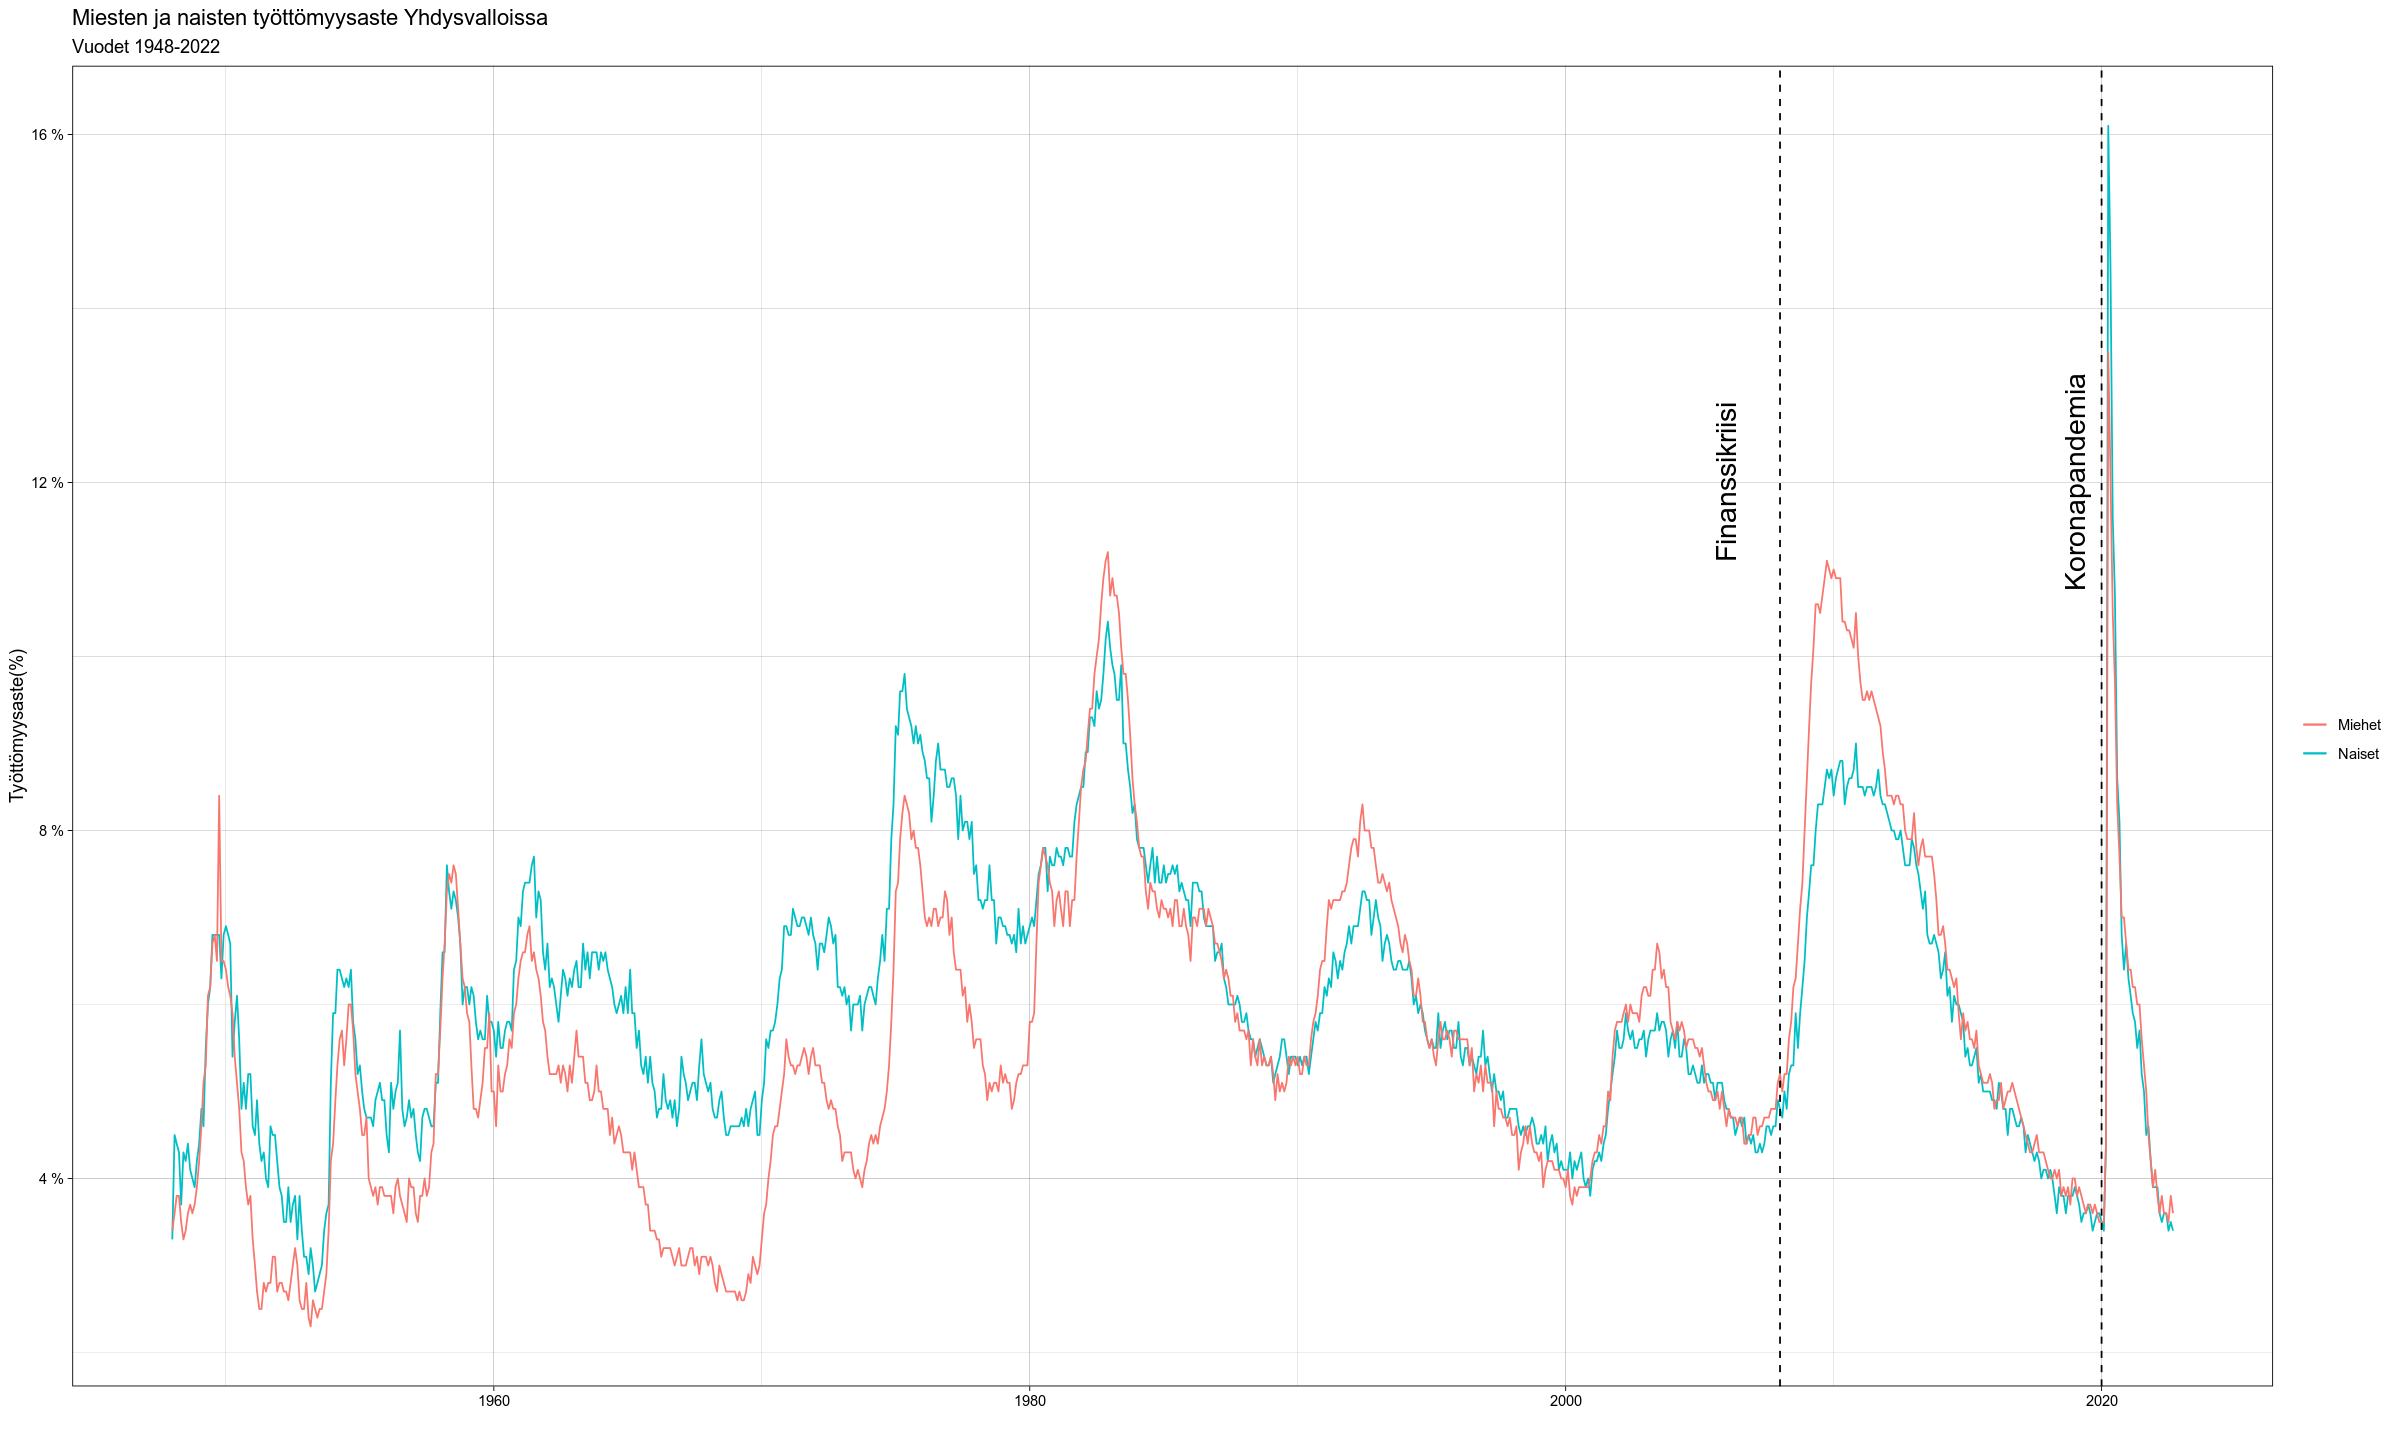

In [69]:
unrate_miehet_naiset = ggplot(data,aes(x=PVM))+
                       geom_line(aes(y=Naiset,col="Naiset"))+
                       geom_line(aes(y=Miehet,col="Miehet"))+
                       xlab("") +
                       ylab("Työttömyysaste(%)") +
                       annotate("text",x=as.Date("2006-01-01"),y=12,label="Finanssikriisi",
                               angle=90,size=6)+
                       annotate("text",x=as.Date("2019-01-01"),y=12,label="Koronapandemia",
                               angle=90,size=6)+
                       labs(title="Miesten ja naisten työttömyysaste Yhdysvalloissa",
                            colour = "",
                            subtitle="Vuodet 1948-2022")+
                       geom_vline(xintercept=as.numeric(as.Date("2008-01-01")),
                                  linetype="dashed")+
                       geom_vline(xintercept=as.numeric(as.Date("2020-01-01"))
                                  , linetype="dashed")+
                       scale_y_continuous(labels=scales::unit_format(unit="%"))+
                       theme_linedraw()

unrate_miehet_naiset